In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)


c:\Users\24ksh\OneDrive\Desktop\emotion detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 65.2M/65.2M [00:23<00:00, 2.94MB/s]

Extracting files...


Path to dataset files: C:\Users\24ksh\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1


In [3]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\24ksh\OneDrive\Desktop\emotion detection\notebook


In [4]:
dataset_path = os.path.join("..", "dataset", "1")
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Now this should work
print("Classes in Train Folder:", os.listdir(train_path))
print("Classes in Test Folder:", os.listdir(test_path))


Classes in Train Folder: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
Classes in Test Folder: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [5]:
import os

dataset_path = r"C:\Users\24ksh\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1"

# Print top-level contents
print("Top-level folders/files:", os.listdir(dataset_path))

# Go into 'train' folder
train_dir = os.path.join(dataset_path, 'train')
if os.path.exists(train_dir):
    print("\nClasses in 'train':", os.listdir(train_dir))

    # Go into the 'angry' folder
    angry_dir = os.path.join(train_dir, 'angry')
    if os.path.exists(angry_dir):
        images = os.listdir(angry_dir)
        print(f"\nFound {len(images)} images in 'train/angry'. First 5 images:")
        print(images[:5])
    else:
        print("\n'angry' folder not found under 'train'")
else:
    print("'train' folder not found in dataset path")


Top-level folders/files: ['test', 'train']

Classes in 'train': ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

Found 3995 images in 'train/angry'. First 5 images:
['im0.png', 'im1.png', 'im10.png', 'im100.png', 'im1000.png']


In [6]:
from PIL import Image

# Use actual filename from previous output
filename = '100.jpg'  # replace with one you actually see
img_path = os.path.join(dataset_path, 'train', 'angry', filename)

img = Image.open(img_path)
img.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\24ksh\\.cache\\kagglehub\\datasets\\ananthu017\\emotion-detection-fer\\versions\\1\\train\\angry\\100.jpg'

In [6]:
import os
import shutil

# Path to your original train folder
source_path = os.path.join("..", "dataset", "1", "train")

# Create new destination folder
destination_path = os.path.join("..", "dataset", "1", "train_combined")
os.makedirs(destination_path, exist_ok=True)

# Loop through each class folder
for emotion in os.listdir(source_path):
    emotion_path = os.path.join(source_path, emotion)
    if not os.path.isdir(emotion_path):
        continue
    
    for count, filename in enumerate(os.listdir(emotion_path)):
        source_file = os.path.join(emotion_path, filename)

        # Give each file a unique name like angry_1.jpg, happy_23.jpg, etc.
        new_filename = f"{emotion}_{count}.jpg"
        destination_file = os.path.join(destination_path, new_filename)

        try:
            shutil.copy2(source_file, destination_file)
        except Exception as e:
            print(f"Error copying {source_file}: {e}")

print("✅ All images copied to train_combined folder.")


KeyboardInterrupt: 

In [7]:
import os
print("Current directory:", os.getcwd())


Current directory: c:\Users\24ksh\OneDrive\Desktop\emotion detection\notebook


In [9]:
import os
import pandas as pd

train_combined_dir = '../dataset/1/train_combined'  # relative path from current dir

# List all image files
image_files = [f for f in os.listdir(train_combined_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

def get_label(filename):
    return filename.split('_')[0]

df = pd.DataFrame({
    'filename': image_files,
    'filepath': [os.path.join(train_combined_dir, f) for f in image_files],
    'label': [get_label(f) for f in image_files]
})

df.head()
df.drop(columns=['filepath'])


,filename,label
0,angry_0.jpg,angry
1,angry_1.jpg,angry
2,angry_10.jpg,angry
3,angry_100.jpg,angry
4,angry_1000.jpg,angry
...,...,...
28704,surprised_995.jpg,surprised
28705,surprised_996.jpg,surprised
28706,surprised_997.jpg,surprised
28707,surprised_998.jpg,surprised


C:\Users\24ksh\AppData\Local\Temp\ipykernel_30588\2847054017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


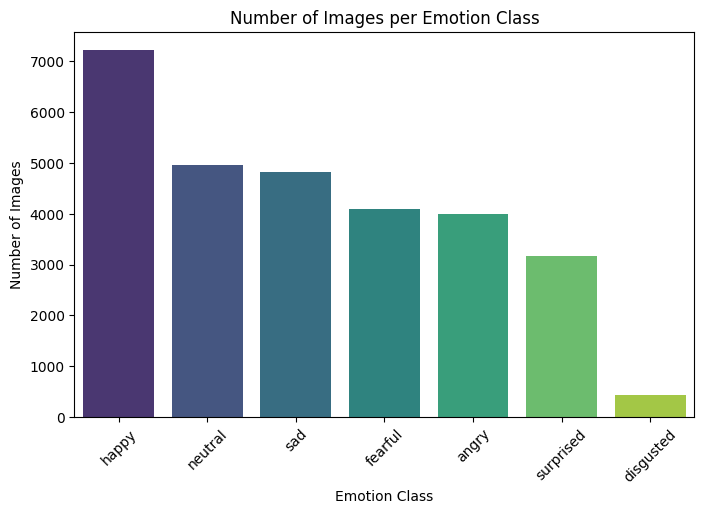

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of images per label
label_counts = df['label'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Emotion Class')
plt.xticks(rotation=45)
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label_encoded']=le.fit_transform(df['label'])
df.head()

,filename,filepath,label,label_encoded
0,angry_0.jpg,../dataset/1/train_combined\angry_0.jpg,angry,0
1,angry_1.jpg,../dataset/1/train_combined\angry_1.jpg,angry,0
2,angry_10.jpg,../dataset/1/train_combined\angry_10.jpg,angry,0
3,angry_100.jpg,../dataset/1/train_combined\angry_100.jpg,angry,0
4,angry_1000.jpg,../dataset/1/train_combined\angry_1000.jpg,angry,0


In [14]:
df = df.drop(columns=['filepath','label'])
df.head()

,filename,label_encoded
0,angry_0.jpg,0
1,angry_1.jpg,0
2,angry_10.jpg,0
3,angry_100.jpg,0
4,angry_1000.jpg,0


In [28]:
df

,filename,label_encoded
0,angry_0.jpg,0
1,angry_1.jpg,0
2,angry_10.jpg,0
3,angry_100.jpg,0
4,angry_1000.jpg,0
...,...,...
28704,surprised_995.jpg,6
28705,surprised_996.jpg,6
28706,surprised_997.jpg,6
28707,surprised_998.jpg,6


In [15]:
train_combined_dir = '../dataset/1/train_combined'


In [16]:
from PIL import Image
import os

# Get the filename from df
image_filename = df['filename'].iloc[0]

# Reconstruct the full path
image_path = os.path.join(train_combined_dir, image_filename)

# Open the image
img = Image.open(image_path)

print(f"Image size (width, height): {img.size}")
print(f"Image mode (channels): {img.mode}")


Image size (width, height): (48, 48)
Image mode (channels): L


In [19]:
from PIL import Image, UnidentifiedImageError
import os

all_same_size = True

for fname in df['filename']:
    path = os.path.join(train_combined_dir, fname)
    try:
        img = Image.open(path)
        if img.size != (48, 48):
            print(f"Image {fname} has size {img.size}")
            all_same_size = False
            break
    except UnidentifiedImageError:
        print(f"Deleting corrupted file: {fname}")
        os.remove(path)
 # skip this file and go to the next one

if all_same_size:
    print("All images are 48x48!")


Deleting corrupted file: happy_978.jpg
All images are 48x48!


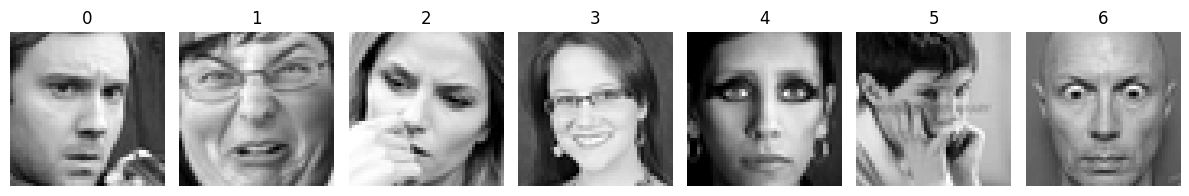

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Get unique labels
unique_labels = df['label_encoded'].unique()

plt.figure(figsize=(12, 6))

for i, label in enumerate(unique_labels):
    # Get first image filename for this label
    sample_filename = df[df['label_encoded'] == label]['filename'].iloc[0]
    image_path = os.path.join(train_combined_dir, sample_filename)
    
    # Open image
    img = Image.open(image_path)
    
    # Plot
    plt.subplot(1, len(unique_labels), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
# Filter out files that no longer exist in the directory
df = df[df['filename'].apply(lambda fname: os.path.exists(os.path.join(train_combined_dir, fname)))].reset_index(drop=True)


In [23]:
import numpy as np
from PIL import Image
import os

image_arrays = []
labels = []

for idx, row in df.iterrows():
    image_path = os.path.join(train_combined_dir, row['filename'])
    img = Image.open(image_path)
    
    # Convert to numpy array (shape: 48x48)
    arr = np.array(img, dtype=np.float32)
    
    # Normalize pixels to 0-1
    arr /= 255.0
    
    # Add a channel dimension to match (48, 48, 1)
    arr = np.expand_dims(arr, axis=-1)
    
    image_arrays.append(arr)
    labels.append(row['label_encoded'])  # Use encoded label
    
# Convert lists to numpy arrays
X = np.array(image_arrays)   # Shape: (num_images, 48, 48, 1)
y = np.array(labels)         # Shape: (num_images,)

print("Images array shape:", X.shape)
print("Labels array shape:", y.shape)


Images array shape: (28708, 48, 48, 1)
Labels array shape: (28708,)


In [24]:
print(df['label_encoded'].value_counts())


label_encoded
3    7214
4    4965
5    4830
2    4097
0    3995
6    3171
1     436
Name: count, dtype: int64


In [26]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation
val_datagen = ImageDataGenerator()

# Step 3: Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


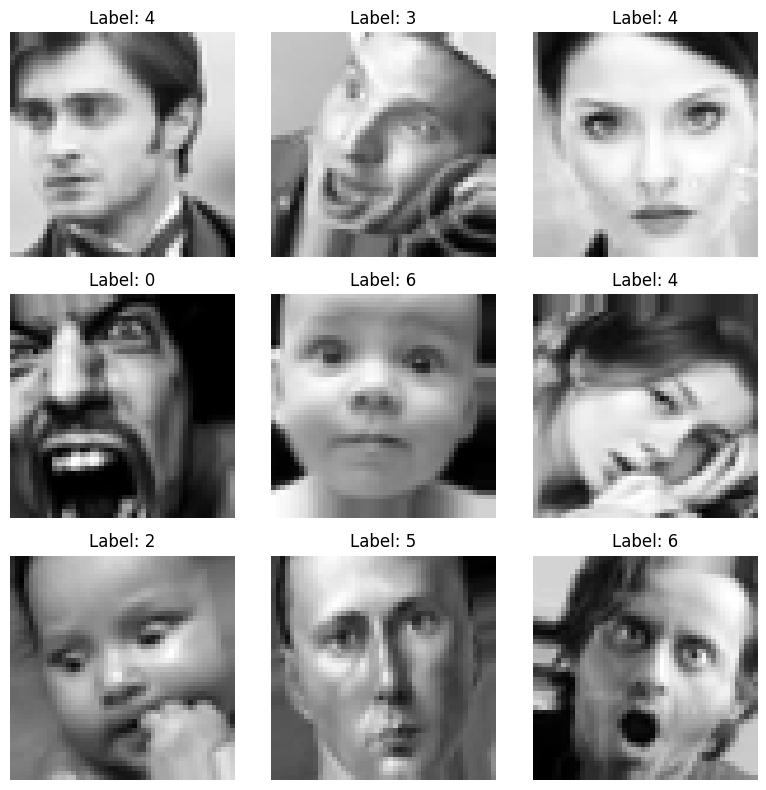

In [28]:
import matplotlib.pyplot as plt

# Get a batch of augmented images
augmented_images, augmented_labels = next(train_generator)

# Plot first 9 images in the batch
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = augmented_images[i].squeeze()  # Remove channel dimension if (48,48,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {augmented_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


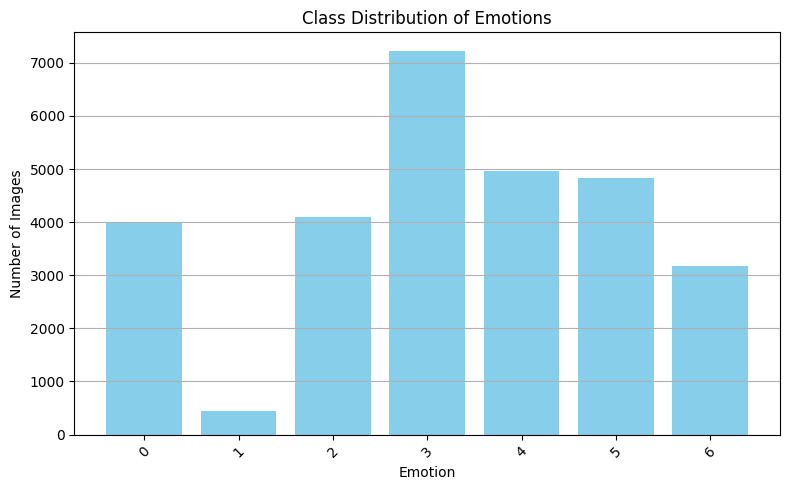

In [31]:
import matplotlib.pyplot as plt

label_counts = df['label_encoded'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.title("Class Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Original class distribution:
label_encoded
0    3995
1     436
2    4097
3    7214
4    4965
5    4830
6    3171
Name: count, dtype: int64


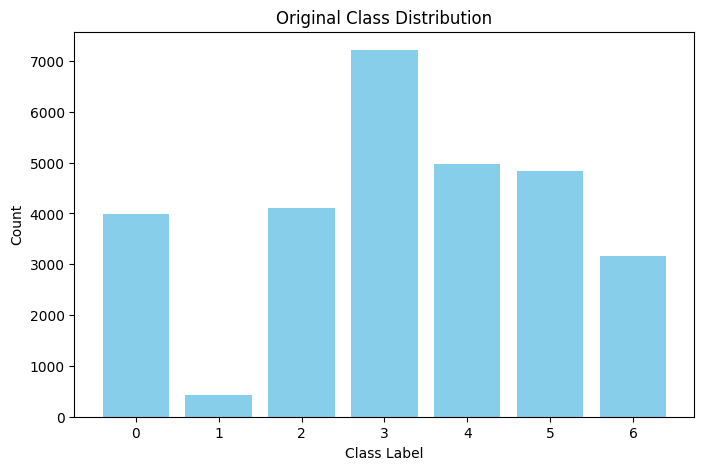

In [33]:
import matplotlib.pyplot as plt

# Original distribution counts
original_counts = df['label_encoded'].value_counts().sort_index()

print("Original class distribution:")
print(original_counts)

plt.figure(figsize=(8,5))
plt.bar(original_counts.index, original_counts.values, color='skyblue')
plt.title("Original Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# We'll create a dictionary mapping class label -> list of image arrays belonging to that class
class_images = {}
for x_img, y_lbl in zip(X, y):
    class_images.setdefault(y_lbl, []).append(x_img)

# Determine max class size to balance
max_size = max(len(imgs) for imgs in class_images.values())

augmented_images = []
augmented_labels = []

for label, images in class_images.items():
    images = np.array(images)
    current_size = len(images)
    
    augmented_images.extend(images)
    augmented_labels.extend([label] * current_size)
    
    # Number of images to generate to balance class size
    n_to_generate = max_size - current_size
    
    if n_to_generate > 0:
        # Use the generator to create augmented images
        # We loop randomly over existing images to generate new ones
        idx = 0
        while n_to_generate > 0:
            img = images[idx % current_size]
            img = np.expand_dims(img, 0)  # datagen expects 4D input
            
            for batch in datagen.flow(img, batch_size=1):
                augmented_images.append(batch[0])
                augmented_labels.append(label)
                n_to_generate -= 1
                break  # one augmented image per loop
            
            idx += 1

# Convert augmented lists to arrays
X_aug = np.array(augmented_images)
y_aug = np.array(augmented_labels)

print(f"Augmented dataset size: {X_aug.shape[0]} images")


Augmented dataset size: 50498 images



Augmented class distribution:
Class 0: 7214
Class 1: 7214
Class 2: 7214
Class 3: 7214
Class 4: 7214
Class 5: 7214
Class 6: 7214


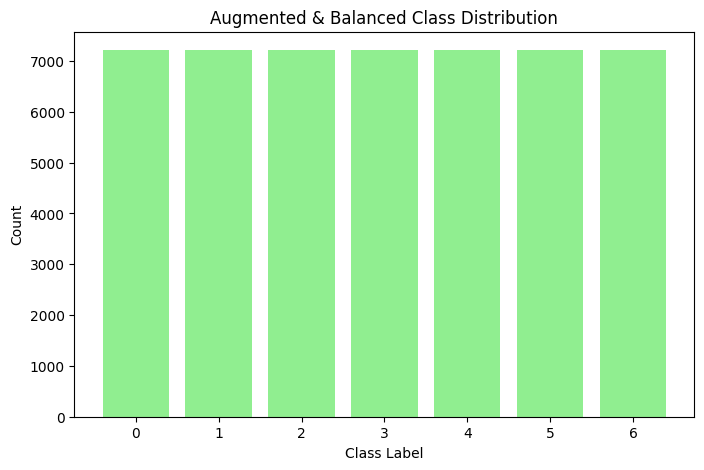

In [35]:
from collections import Counter

aug_counts = Counter(y_aug)

print("\nAugmented class distribution:")
for cls, count in sorted(aug_counts.items()):
    print(f"Class {cls}: {count}")

plt.figure(figsize=(8,5))
plt.bar([str(c) for c in sorted(aug_counts.keys())], [aug_counts[c] for c in sorted(aug_counts.keys())], color='lightgreen')
plt.title("Augmented & Balanced Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_aug, y_aug, test_size=0.2, stratify=y_aug, random_state=42
)

In [41]:
y_aug.shape

(50498,)

In [53]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(48, 48, 1)),

    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.GlobalAveragePooling2D(),  # replaces Flatten()
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,079 (1012.03 KB)

 Trainable params: 258,375 (1009.28 KB)

 Non-trainable params: 704 (2.75 KB)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Compile the model before training
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# 3. Train the model
history = model.fit(
    X_aug, y_aug,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 78s 95ms/step - accuracy: 0.2808 - loss: 1.8395 - val_accuracy: 0.3277 - val_loss: 1.7326
Epoch 2/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 72s 91ms/step - accuracy: 0.4823 - loss: 1.3637 - val_accuracy: 0.4296 - val_loss: 1.4685
Epoch 3/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.5550 - loss: 1.1823 - val_accuracy: 0.3875 - val_loss: 1.7466
Epoch 4/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.5928 - loss: 1.0761 - val_accuracy: 0.5098 - val_loss: 1.3215
Epoch 5/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6129 - loss: 1.0339 - val_accuracy: 0.5037 - val_loss: 1.3693
Epoch 6/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.6487 - loss: 0.9296 - val_accuracy: 0.6879 - val_loss: 0.8376
Epoch 7/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.6673 - loss: 0.8675 - val_accuracy: 0.5843 - val_loss: 1.1134
Epoch 8/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.6964 - loss: 0.8070 - 

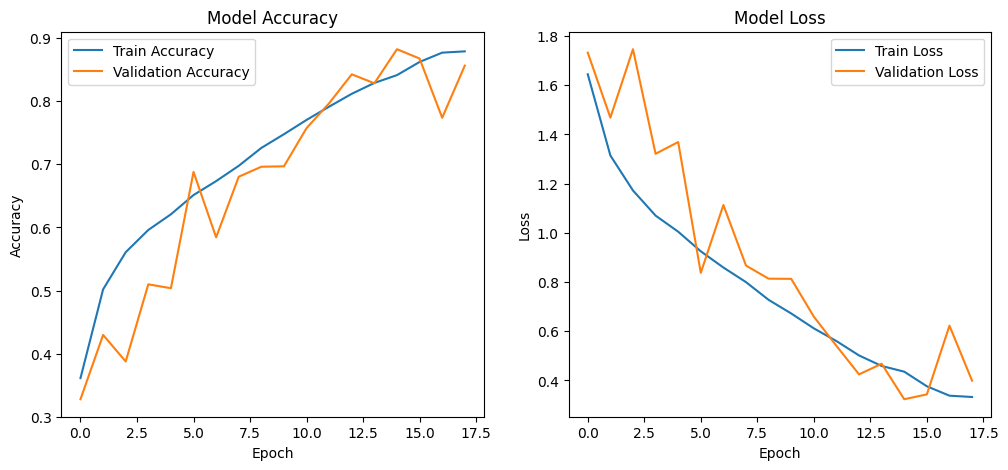

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [58]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8823 - loss: 0.3351
Test Accuracy: 88.14%
Test Loss: 0.3403


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


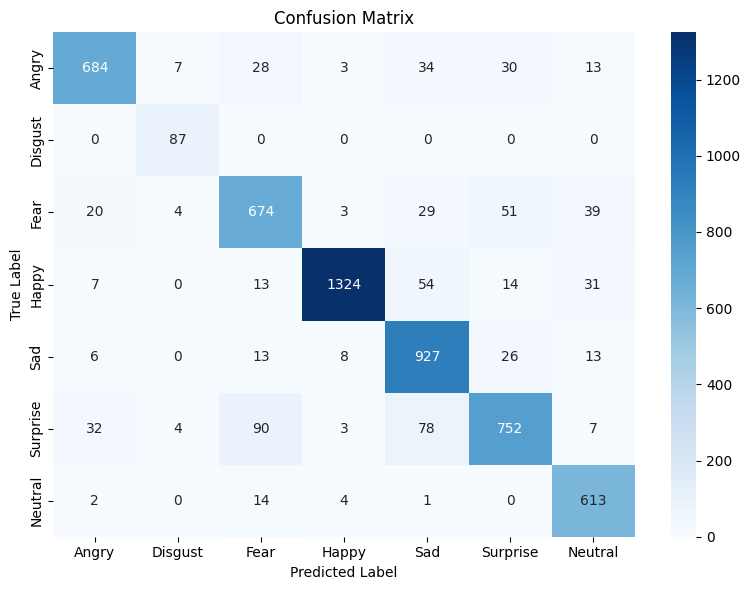

Classification Report:

              precision    recall  f1-score   support

       Angry       0.91      0.86      0.88       799
     Disgust       0.85      1.00      0.92        87
        Fear       0.81      0.82      0.82       820
       Happy       0.98      0.92      0.95      1443
         Sad       0.83      0.93      0.88       993
    Surprise       0.86      0.78      0.82       966
     Neutral       0.86      0.97      0.91       634

    accuracy                           0.88      5742
   macro avg       0.87      0.90      0.88      5742
weighted avg       0.88      0.88      0.88      5742



In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (make sure they match your dataset)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


In [61]:
# Save the trained model
model.save('model.h5')
print("✅ Model saved as model.h5")


✅ Model saved as model.h5


In [67]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\24ksh\OneDrive\Desktop\emotion detection\notebook


In [68]:
import os
import shutil

# Correct path to your test folder
base_test_path = '../dataset/1/test'
target_path = '../dataset/1/combined_test'

# Create the target folder if it doesn't exist
os.makedirs(target_path, exist_ok=True)

# Iterate over emotion folders
for emotion in os.listdir(base_test_path):
    emotion_path = os.path.join(base_test_path, emotion)
    
    # Make sure it's a directory
    if os.path.isdir(emotion_path):
        for img_file in os.listdir(emotion_path):
            src = os.path.join(emotion_path, img_file)
            dst = os.path.join(target_path, f"{emotion}_{img_file}")
            shutil.copy(src, dst)

print(f"All images copied to: {os.path.abspath(target_path)}")


All images copied to: c:\Users\24ksh\OneDrive\Desktop\emotion detection\dataset\1\combined_test
